In [1]:
#MEDPC rat gambling task functions imports, will print "I am being executed!" if functional
import sparklyRGT as rgt

#main imports 
import os
import pandas as pd
import numpy as np

# plotting imports 
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# stats imports 
import scipy.stats as stats

#the following lines prevents pandas from giving unecessary errors and increases the number of rows you can view 
pd.options.mode.chained_assignment = None
pd.set_option('display.max_rows',100)

I am being executed!


***

# 1) Load data into Python



In [2]:
file_names = ['BH07_raw_free_S29-30.xlsx'] 

df = rgt.load_data(file_names)

df.head()


,MSN,StartDate,StartTime,Subject,Group,Box,Experiment,Comment,Session,Trial,...,Pun_Persev_H5,Pun_HeadEntry,Pun_Dur,Premature_Resp,Premature_Hole,Rew_Persev_H1,Rew_Persev_H2,Rew_Persev_H3,Rew_Persev_H4,Rew_Persev_H5
0,rGT_A-cue,2020-10-09,11:01:00,25,0.0,1,0.0,NaN,29,1.0,...,3,3,30,0,0,0,0,0,0,0
1,rGT_A-cue,2020-10-09,11:01:00,25,0.0,1,0.0,NaN,29,2.1,...,0,0,0,1,5,0,0,0,0,0
2,rGT_A-cue,2020-10-09,11:01:00,25,0.0,1,0.0,NaN,29,2.0,...,3,2,30,0,0,0,0,0,0,0
3,rGT_A-cue,2020-10-09,11:01:00,25,0.0,1,0.0,NaN,29,3.0,...,0,0,0,0,0,0,0,0,0,0
4,rGT_A-cue,2020-10-09,11:01:00,25,0.0,1,0.0,NaN,29,4.0,...,2,2,30,0,0,0,0,0,0,0


***
# 2A) Baseline & Acquisition Analysis


In [4]:
control_group = [3, 4, 5, 6, 9, 13, 14, 15, 17, 18, 23, 24, 27, 28, 30, 31] #In this example: Tg negative rats

exp_group = [1, 2, 7, 8, 11, 12, 16, 19, 20, 21, 22, 25, 26, 29, 32] #In this example: Tg positive rats

group_names = {0: 'Tg negative',
              1: 'Tg positive'} 

group_list = [control_group, exp_group]

#for plotting: 
title = 'Nigrostriatal activation during acquisition' 

startsess = 29 
endsess = 30 

## Data cleaning

### Check session numbers for each rat

In [5]:
rgt.check_sessions(df)

Subject  StartDate   Session
1        2020-10-09  29         131.1
         2020-10-10  30         124.0
2        2020-10-09  29          76.1
         2020-10-10  30          81.0
3        2020-10-09  29          49.0
         2020-10-10  30          45.0
4        2020-10-09  29         103.0
         2020-10-10  30          97.0
5        2020-10-09  29          68.1
         2020-10-10  30          69.0
6        2020-10-09  29          88.0
         2020-10-10  30          75.0
7        2020-10-09  28          53.0
         2020-10-10  29          65.0
         2020-10-13  30          56.1
8        2020-10-09  29         124.0
         2020-10-10  30         121.0
9        2020-10-09  29          62.0
         2020-10-10  30          61.0
11       2020-10-09  29         132.0
         2020-10-10  30         136.1
12       2020-10-09  29          54.0
         2020-10-10  30          72.0
13       2020-10-09  29          67.0
         2020-10-10  30          60.0
14       2020-10-09  

### Drop/edit session numbers

In [6]:
df2 = rgt.drop_sessions(df, [28])

### Check that you dropped/edited the desired session(s)

In [7]:
rgt.check_sessions(df2) 

Subject  StartDate   Session
1        2020-10-09  29         131.1
         2020-10-10  30         124.0
2        2020-10-09  29          76.1
         2020-10-10  30          81.0
3        2020-10-09  29          49.0
         2020-10-10  30          45.0
4        2020-10-09  29         103.0
         2020-10-10  30          97.0
5        2020-10-09  29          68.1
         2020-10-10  30          69.0
6        2020-10-09  29          88.0
         2020-10-10  30          75.0
7        2020-10-10  29          65.0
         2020-10-13  30          56.1
8        2020-10-09  29         124.0
         2020-10-10  30         121.0
9        2020-10-09  29          62.0
         2020-10-10  30          61.0
11       2020-10-09  29         132.0
         2020-10-10  30         136.1
12       2020-10-09  29          54.0
         2020-10-10  30          72.0
13       2020-10-09  29          67.0
         2020-10-10  30          60.0
14       2020-10-09  29          80.1
         2020-10-10  

## Data processing

### Calculate variables for each rat


In [8]:
df_sum = rgt.get_summary_data(df2) 
df_sum 

,29P1,29P2,29P3,29P4,30P1,30P2,30P3,30P4,risk29,risk30,collect_lat29,collect_lat30,choice_lat29,choice_lat30,omit29,omit30,trial29,trial30,prem29,prem30
1,90.8397,0,8.39695,0.763359,83.0645,0,16.9355,0,81.6794,66.129,0.929160,1.058226,0.638321,0.655323,0,0,131.1,124.0,26.404494,24.848485
2,9.33333,65.3333,10.6667,14.6667,4.93827,76.5432,0,18.5185,49.3333,62.963,1.157333,1.010617,1.057733,1.249012,1,0,76.1,81.0,30.275229,33.606557
3,2.17391,8.69565,56.5217,32.6087,0,11.6279,67.4419,20.9302,-78.2609,-76.7442,0.467174,0.549070,2.833261,3.652791,3,2,49.0,45.0,3.921569,6.250000
4,5.88235,73.5294,4.90196,15.6863,13.4021,64.9485,3.09278,18.5567,58.8235,56.701,0.904412,0.817938,1.000980,0.885258,1,0,103.0,97.0,13.445378,24.218750
5,0,1.53846,98.4615,0,9.375,7.8125,79.6875,3.125,-96.9231,-65.625,0.397385,0.618125,3.135846,3.176250,3,5,68.1,69.0,8.108108,16.867470
6,2.5,70,0,27.5,2.94118,63.2353,0,33.8235,45,32.3529,0.739000,0.686618,2.172000,1.859265,8,7,88.0,75.0,9.278351,15.730337
7,3.07692,10.7692,64.6154,21.5385,1.81818,10.9091,69.0909,18.1818,-72.3077,-74.5455,0.439077,0.473273,1.012615,1.194545,0,0,65.0,56.1,16.666667,34.523810
8,2.41935,92.7419,0.806452,4.03226,2.47934,94.2149,1.65289,1.65289,90.3226,93.3884,1.401532,1.353884,1.850484,1.956033,0,0,124.0,121.0,10.144928,12.949640
9,3.27869,3.27869,90.1639,3.27869,5.26316,7.01754,82.4561,5.26316,-86.8852,-75.4386,0.367869,0.349474,2.300328,2.754211,1,4,62.0,61.0,20.512821,11.594203
11,10.687,88.5496,0.763359,0,8.14815,91.1111,0,0.740741,98.4733,98.5185,1.116794,1.246519,1.950153,1.667852,1,0,132.0,136.1,2.222222,7.534247


### Get the risk status of the rats


In [9]:
df_sum, risky, optimal = rgt.get_risk_status(df_sum, startsess, endsess)

print(df_sum[['mean_risk','risk_status']]) 
print(risky, optimal) 

    mean_risk  risk_status
1   73.904211          1.0
2   56.148148          1.0
3  -77.502528          2.0
4   57.762280          1.0
5  -81.274038          2.0
6   38.676471          1.0
7  -73.426573          2.0
8   91.855505          1.0
9  -81.161921          2.0
11  98.495900          1.0
12  32.942097          1.0
13 -33.705357          2.0
14  43.214286          1.0
15 -41.344124          2.0
16 -30.296896          2.0
17   0.633446          1.0
18  41.629689          1.0
19   4.054054          1.0
20  91.116505          1.0
21  11.868687          1.0
22  62.978469          1.0
23  75.345912          1.0
24  71.178218          1.0
25 -98.437500          2.0
26  35.270270          1.0
27  44.732745          1.0
28  43.102453          1.0
29 -30.433996          2.0
30  94.573643          1.0
31  80.796731          1.0
32   1.587302          1.0
[3, 5, 7, 9, 13, 15, 16, 25, 29] [1, 2, 4, 6, 8, 11, 12, 14, 17, 18, 19, 20, 21, 22, 23, 24, 26, 27, 28, 30, 31, 32]


### Export your data to an Excel file 


In [10]:
rgt.export_to_excel(df_sum, groups = group_list, column_name = 'tg_status', new_file_name = 'BH07_free_S29-30.xlsx', asin = True)

## Calculate means and SEMs for your experimental groups



In [12]:
mean_scores, SEM = rgt.get_means_sem(df_sum, groups = group_list, group_names = group_names)
mean_scores
# SEM

,29P1,29P2,29P3,29P4,30P1,30P2,30P3,30P4,risk29,risk30,...,choice_lat29,choice_lat30,omit29,omit30,trial29,trial30,prem29,prem30,mean_risk,risk_status
Tg negative,5.74901,50.9906,33.8409,9.41941,7.24256,53.3089,28.8852,10.5634,13.4793,21.1029,...,2.10245,2.07925,3.25,3.5,77.4563,83.0812,14.055,13.637,17.2911,1.3125
Tg positive,16.0466,45.0598,21.712,17.1815,14.8991,45.8362,22.0626,17.2021,22.2129,21.4706,...,1.77515,1.82612,1.53333,2.73333,86.56,85.0267,18.3601,20.5969,21.8417,1.26667


# 2B) Baseline & Acquisition Analysis: Plotting


## Bar plot of P1-P4 % choice


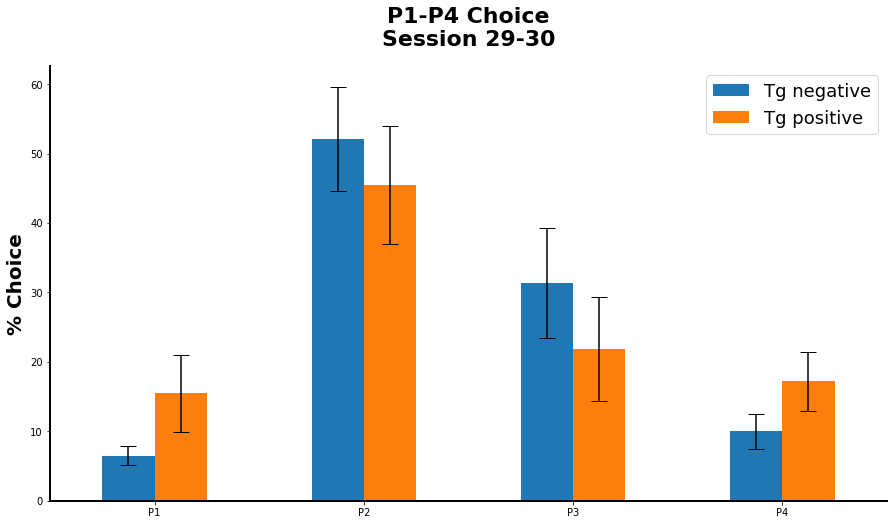

In [13]:
rgt.choice_bar_plot(startsess, endsess, mean_scores, SEM)

#To save figure:
plt.savefig('BH07 Choice S29-30',facecolor = 'white')

## Line plot of other variables


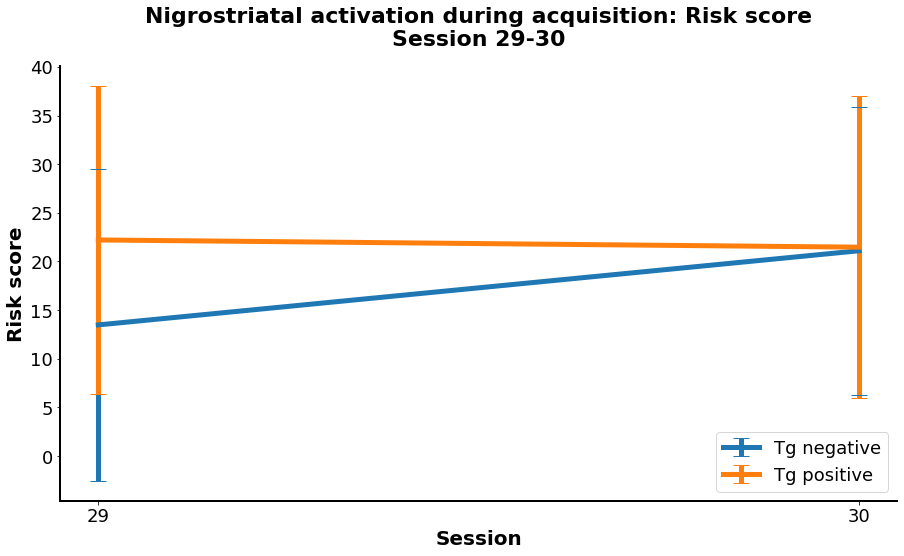

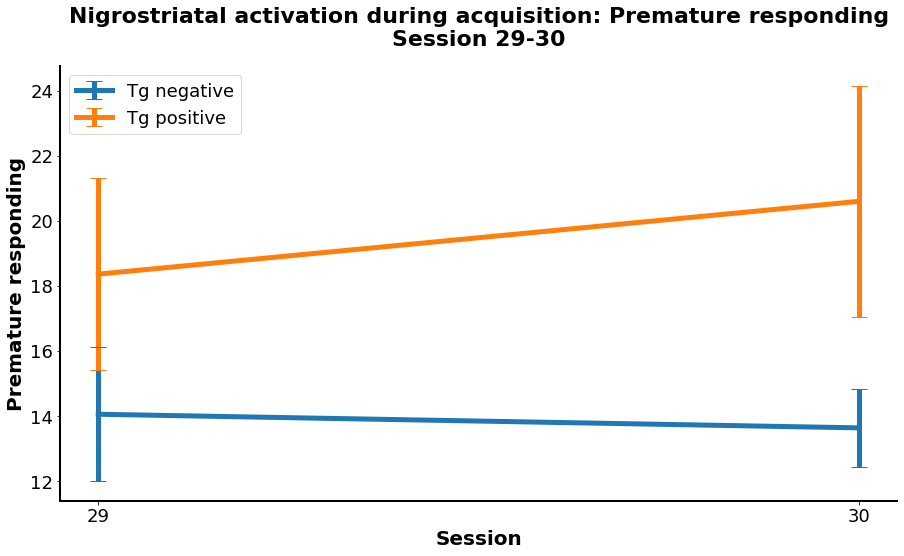

In [14]:
rgt.rgt_plot('risk', startsess, endsess, title, mean_scores, SEM, group_names = group_names, y_label = 'Risk score') 

rgt.rgt_plot('prem', startsess, endsess, title, mean_scores, SEM, group_names = group_names, y_label = 'Premature responding') 

## Bar plot of other variables



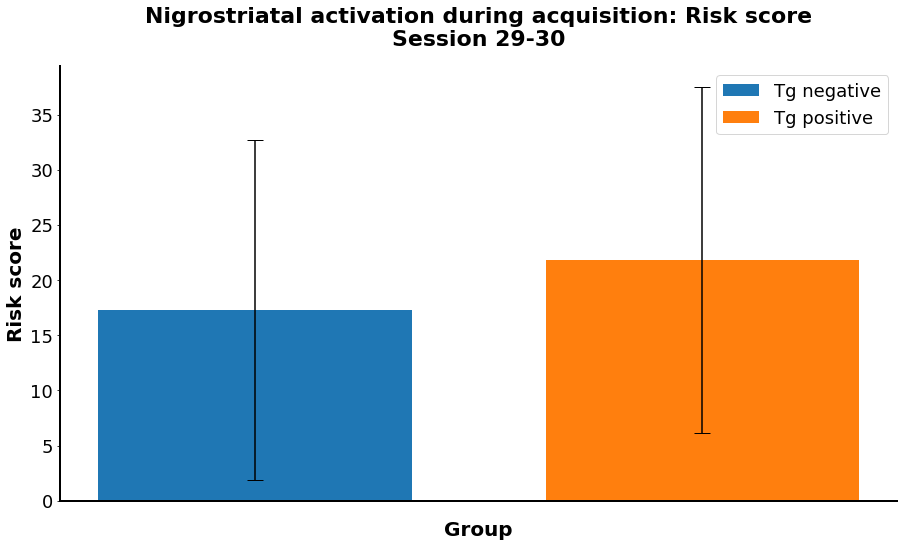

In [15]:
rgt.rgt_bar_plot('risk', startsess, endsess, title, mean_scores, SEM, group_names, y_label = 'Risk score')

***
# 3A) Latin Square Analysis

**This section assumes you have assigned dosing information to the 'Group' variable in MEDPC**
* in this example: vehicle = 1 in Group column, low dose = 2, mid dose = 3, high dose = 4


In [16]:
file_names = ['BH06_raw_round1-infusions.xlsx', 'BH06_raw_round1-makeup.xlsx'] 

df = rgt.load_data(file_names)

#for plotting: 
title = '5-HT2c Antagonist' 

#lowest group number
startdose =  1
#highest group number
enddose = 4

## Data cleaning

### Check the Group numbers for each rat


In [17]:
rgt.check_groups(df)

Subject  Group
1        1         50.1
         2         79.1
         3         40.0
         4        111.0
2        1         77.0
         2         74.0
         3         70.0
         4         94.0
3        1         50.1
         2         38.1
         3         45.0
         4         40.0
4        1         86.0
         2         82.0
         3         95.0
         4         79.0
5        0         87.0
         1         79.1
         2         79.0
         4        128.0
6        1        125.1
         2         98.0
         3        105.0
         4        121.0
7        1         76.1
         2         80.1
         3         68.0
         4         57.1
8        1         75.0
         2         58.0
         3         57.1
         4         66.0
9        1         65.1
         2         69.0
         3         55.0
         4         48.0
11       1         56.1
         2         58.0
         3         61.0
         4         55.0
12       1         63.0
 

### Drop subjects & edit Group numbers


In [18]:
df2 = rgt.edit_groups(df, orig_group = [0], new_group = [3], subs = [5])

df2 = rgt.drop_subjects(df, subs = [7])


### Check that you edited the Group number/dropped subjects as desired

In [19]:
rgt.check_groups(df2)

Subject  Group
1        1         50.1
         2         79.1
         3         40.0
         4        111.0
2        1         77.0
         2         74.0
         3         70.0
         4         94.0
3        1         50.1
         2         38.1
         3         45.0
         4         40.0
4        1         86.0
         2         82.0
         3         95.0
         4         79.0
5        1         79.1
         2         79.0
         3         87.0
         4        128.0
6        1        125.1
         2         98.0
         3        105.0
         4        121.0
8        1         75.0
         2         58.0
         3         57.1
         4         66.0
9        1         65.1
         2         69.0
         3         55.0
         4         48.0
11       1         56.1
         2         58.0
         3         61.0
         4         55.0
12       1         63.0
         3         80.0
         4         95.1
13       1         55.0
         2         63.1
 

## Data processing

### Calculate variables for each rat at each dose


In [20]:
df_sum = rgt.get_summary_data(df2, mode = 'Group')
df_sum

,1P1,1P2,1P3,1P4,2P1,2P2,2P3,2P4,3P1,3P2,...,omit3,omit4,trial1,trial2,trial3,trial4,prem1,prem2,prem3,prem4
1,0,34,64,2,0,57.1429,35.0649,7.79221,5,40,...,0,2,50.1,79.1,40.0,111.0,54.954955,32.478632,70.588235,14.615385
2,3.8961,59.7403,7.79221,28.5714,12.3288,61.6438,6.84932,19.1781,8.57143,45.7143,...,0,1,77.0,74.0,70.0,94.0,23.000000,28.846154,31.372549,17.543860
3,0,18,78,4,0,13.8889,80.5556,5.55556,2.22222,20,...,0,0,50.1,38.1,45.0,40.0,57.264957,70.400000,64.000000,56.989247
4,1.23457,67.9012,0,30.8642,1.21951,65.8537,0,32.9268,0,77.6596,...,1,2,86.0,82.0,95.0,79.0,24.561404,21.904762,16.666667,15.957447
5,5.12821,35.8974,55.1282,3.84615,3.84615,61.5385,28.2051,6.41026,17.4419,40.6977,...,1,0,79.1,79.0,87.0,128.0,33.898305,41.044776,21.621622,19.496855
6,1.62602,85.3659,0,13.0081,2.06186,72.1649,0,25.7732,1.90476,69.5238,...,0,0,125.1,98.0,105.0,121.0,13.888889,15.517241,10.256410,1.626016
8,4,44,0,52,6.89655,31.0345,5.17241,56.8966,0,42.8571,...,0,0,75.0,58.0,57.1,66.0,18.478261,42.574257,47.169811,41.071429
9,0,1.5625,98.4375,0,0,14.9254,82.0896,2.98507,1.85185,11.1111,...,1,2,65.1,69.0,55.0,48.0,26.436782,24.175824,46.078431,54.716981
11,3.63636,1.81818,94.5455,0,1.72414,3.44828,93.1034,1.72414,1.63934,4.91803,...,0,0,56.1,58.0,61.0,55.0,35.294118,31.764706,11.594203,29.487179
12,1.75439,66.6667,12.2807,19.2982,NaN,NaN,NaN,NaN,6.25,68.75,...,0,0,63.0,NaN,80.0,95.1,18.181818,NaN,35.483871,20.833333


### Impute missing data


In [21]:
df_sum = rgt.impute_missing_data(df_sum, session = 2, subject = 12, choice = 'all', vars = 'all')
df_sum

,1P1,1P2,1P3,1P4,2P1,2P2,2P3,2P4,3P1,3P2,...,omit3,omit4,trial1,trial2,trial3,trial4,prem1,prem2,prem3,prem4
1,0,34,64,2,0,57.1429,35.0649,7.79221,5,40,...,0,2,50.1,79.1,40.0,111.0,54.954955,32.478632,70.588235,14.615385
2,3.8961,59.7403,7.79221,28.5714,12.3288,61.6438,6.84932,19.1781,8.57143,45.7143,...,0,1,77.0,74.0,70.0,94.0,23.000000,28.846154,31.372549,17.543860
3,0,18,78,4,0,13.8889,80.5556,5.55556,2.22222,20,...,0,0,50.1,38.1,45.0,40.0,57.264957,70.400000,64.000000,56.989247
4,1.23457,67.9012,0,30.8642,1.21951,65.8537,0,32.9268,0,77.6596,...,1,2,86.0,82.0,95.0,79.0,24.561404,21.904762,16.666667,15.957447
5,5.12821,35.8974,55.1282,3.84615,3.84615,61.5385,28.2051,6.41026,17.4419,40.6977,...,1,0,79.1,79.0,87.0,128.0,33.898305,41.044776,21.621622,19.496855
6,1.62602,85.3659,0,13.0081,2.06186,72.1649,0,25.7732,1.90476,69.5238,...,0,0,125.1,98.0,105.0,121.0,13.888889,15.517241,10.256410,1.626016
8,4,44,0,52,6.89655,31.0345,5.17241,56.8966,0,42.8571,...,0,0,75.0,58.0,57.1,66.0,18.478261,42.574257,47.169811,41.071429
9,0,1.5625,98.4375,0,0,14.9254,82.0896,2.98507,1.85185,11.1111,...,1,2,65.1,69.0,55.0,48.0,26.436782,24.175824,46.078431,54.716981
11,3.63636,1.81818,94.5455,0,1.72414,3.44828,93.1034,1.72414,1.63934,4.91803,...,0,0,56.1,58.0,61.0,55.0,35.294118,31.764706,11.594203,29.487179
12,1.75439,66.6667,12.2807,19.2982,4.00219,67.7083,10.5154,17.7741,6.25,68.75,...,0,0,63.0,71.5,80.0,95.1,18.181818,26.832845,35.483871,20.833333


### Get risk status based on vehicle dose data


In [22]:
df_sum,risky,optimal = rgt.get_risk_status_vehicle(df_sum)
print(risky, optimal)

[1, 3, 5, 8, 9, 11, 13, 15] [2, 4, 6, 12, 14, 16]


### Export your data to an Excel file

In [24]:
rgt.export_to_excel(df_sum, new_file_name = 'BH06_all-data.xlsx', asin = True)

## Calculate means and SEMs for each dose


In [25]:
mean_scores, SEM = rgt.get_means_sem(df_sum)
mean_scores

,1P1,1P2,1P3,1P4,2P1,2P2,2P3,2P4,3P1,3P2,...,omit4,trial1,trial2,trial3,trial4,prem1,prem2,prem3,prem4,risk_status
All rats,2.65114,42.2559,42.0365,13.0564,4.67103,44.1424,35.9586,15.228,4.60486,44.0535,...,1.14286,73.3286,72.35,73.5143,80.5929,27.6438,31.1593,31.8551,25.6855,1.57143


# 3B) Latin Square Analysis: Plotting


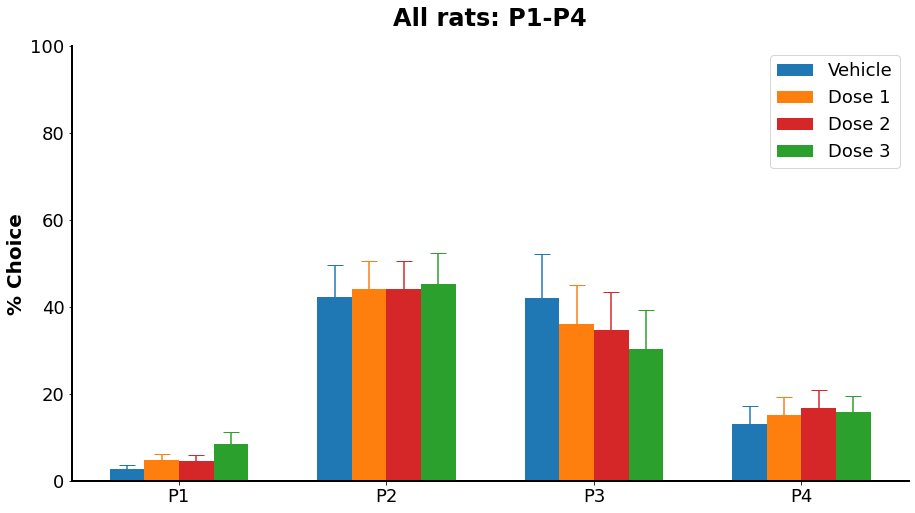

In [26]:
rgt.ls_bar_plot('All rats',mean_scores,SEM)

## Line plot of other variables


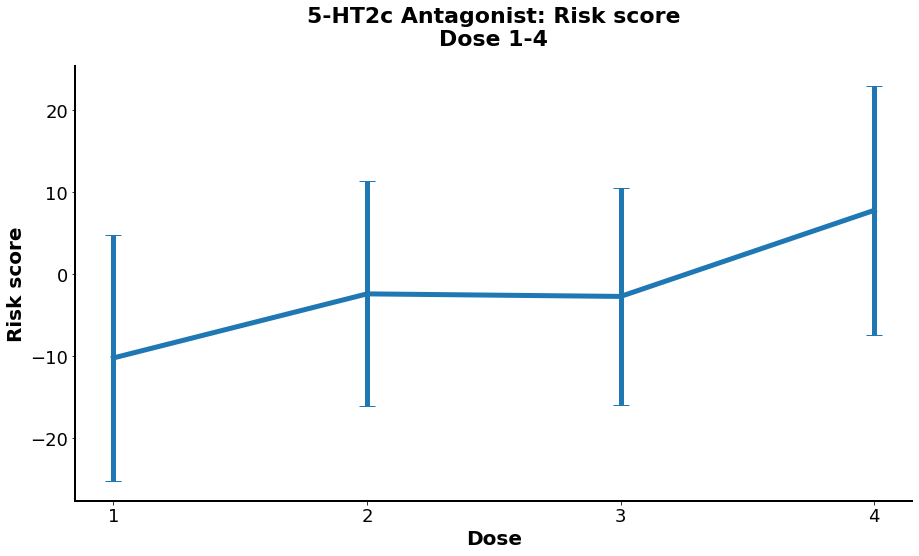

In [27]:
rgt.rgt_plot('risk',startdose,enddose,title,mean_scores,SEM,y_label = 'Risk score', x_label = 'Dose')